# Reading Dataset

In [ ]:
import pandas as pd

# Membuat dataset
data = {'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
        'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
        'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']}

df = pd.DataFrame(data)
# Menampilkan dataset
print(df)


     Outlook Temperature Humidity  Windy Play Golf
0      Sunny         Hot     High  False        No
1      Sunny         Hot     High   True        No
2   Overcast         Hot     High  False       Yes
3       Rain        Mild     High  False       Yes
4       Rain        Cool   Normal  False       Yes
5       Rain        Cool   Normal   True        No
6   Overcast        Cool   Normal   True       Yes
7      Sunny        Mild     High  False        No
8      Sunny        Cool   Normal  False       Yes
9       Rain        Mild   Normal  False       Yes
10     Sunny        Mild   Normal   True       Yes
11  Overcast        Mild     High   True       Yes
12  Overcast         Hot   Normal  False       Yes
13      Rain        Mild     High   True        No


install library !pip install graphviz


In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import pandas as pd
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Encode categorical variables
le = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Define features and target variable
X = df.drop('Play Golf', axis=1)
y = df['Play Golf']

# Fit a decision tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Print the tree in text format
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

# Create a visualization of the tree
dot_data = export_graphviz(clf, out_file=None, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png')


|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1



'decision_tree.png'

In [ ]:
# Print the decision tree rules
tree_rules = export_text(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'])
print(tree_rules)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1



Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

prediksi dan evaluasi

In [ ]:
y_pred = dt_classifier.predict(X_test)

Metrik Kalkulasi

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')


Accuracy: 1.0
ROC AUC: 1.0


Plotting AUC

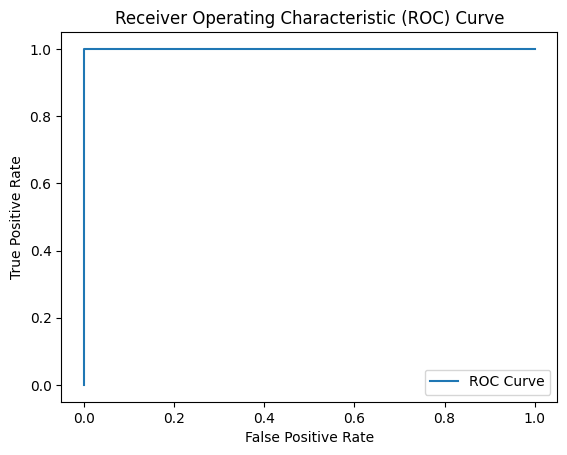

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Matrik KOnfusi

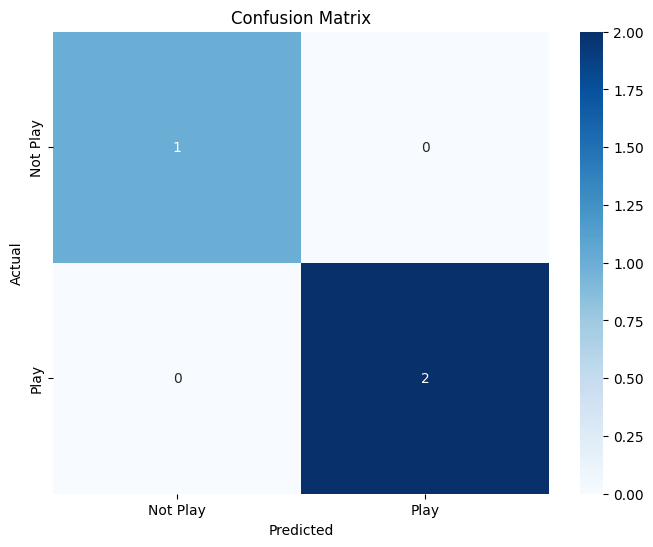

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menghitung matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan matriks konfusi dengan label
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Play', 'Play'],
            yticklabels=['Not Play', 'Play'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Menghitung akurasi
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# Menghitung spesifisitas
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Menghitung sensitivitas
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

print(f"Akurasi: {accuracy:.2f}")
print(f"Spesifisitas: {specificity:.2f}")
print(f"Sensitivitas: {sensitivity:.2f}")


Akurasi: 1.00
Spesifisitas: 1.00
Sensitivitas: 1.00
